<h1><center>Projet MLops</center></h1>

<center><strong>Projet Realisé par : </strong><br /> - <b>SASSIOUI</b> Ayoub <br /> - <b>AMAGHOSS</b> Yassine</center>- <b>EL MRIHY</b> Abdelmoula</center>
<hr>

<h1> Chargement des biliothéques necessaires </h1>

<b>scikit-learn</b><br />
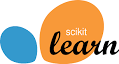
Scikit-learn est une bibliothèque logicielle gratuite d'apprentissage automatique pour le langage de programmation Python. Il comporte divers algorithmes de classification, de régression et de clustering, y compris des machines à vecteurs de support... 

<b>Pandas</b><br />


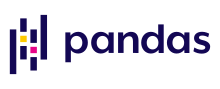


Pandas est une bibliothèque écrite pour le langage de programmation Python permettant la manipulation et l'analyse des données. Elle propose en particulier des structures de données et des opérations de manipulation de tableaux numériques et de séries temporelles. Pandas est un logiciel libre sous licence BSD. 

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import numpy as np
from statistics import mean

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from scipy.stats import randint
from sklearn import metrics
from xgboost import XGBClassifier

from IPython.display import Image

# figure size in inches
import warnings 
warnings.filterwarnings(action = "ignore")
rcParams["figure.dpi"] = 250
plt.style.use("ggplot")

In [5]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<h1> Chargement de la Data </h1>

Liste des variables : 
<ul>
    <li> $Y$ Display</li>
    <li> $X_{1}$ cor_sales_in_vol </li>
    <li> $X_{2}$ cor_sales_in_val </li>
    <li> $X_{3}$ CA_mag </li>
    <li> $X_{4}$ value </li>
    <li> $X_{5}$ ENSEIGNE </li>
    <li> $X_{6}$ VenteConv </li>
    <li> $X_{7}$ Feature </li>
</ul>

<h2> Balanced dataset </h1>

In [6]:
#lecture de la dataset equilibrée en spécifiant le separteur, dans ce cas le sépérateur est ";"
dataset = pd.read_csv("new_Base_CDM_balanced_V2.csv", delimiter = ";").iloc[1:]
dataset.head()

,Y,X1,X2,X3,X4,X5,X6,X7
1,No_Displ,2,20.2,47400,36,CORA,72,No_Feat
2,No_Displ,2,11.9,62000,24,LECLERC,48,No_Feat
3,No_Displ,8,29.52,60661,60,AUCHAN,480,No_Feat
4,No_Displ,2,16.2,59677,19,CARREFOUR,38,No_Feat
5,No_Displ,5,62.1,142602,50,CORA,250,No_Feat


In [7]:
#afficher la taille de la dataset
dataset.shape

(25782, 8)

On remarque ici que toutes les variables de notre dataset sont de type <code>dtype: object</code>, pour résoudre ce problème de type de données on va utiliser la méthode <code>.astype(datatype)</code> de Pandas, dans la cellule suivante on va convertir le type de données des variables.

In [8]:
#convertir les types de données object en float
dataset["X1"] = dataset["X1"].astype(float)
dataset["X2"] = dataset["X2"].astype(float)
dataset["X3"] = dataset["X3"].astype(float)
dataset["X4"] = dataset["X4"].astype(float)
dataset["X6"] = dataset["X6"].astype(float)

In [9]:
#affichage des types de données
dataset.dtypes

Y      object
X1    float64
X2    float64
X3    float64
X4    float64
X5     object
X6    float64
X7     object
dtype: object

In [10]:
#statistiques descriptives avec la méthode predifinie dans pandas .describe()
dataset.describe()

,X1,X2,X3,X4,X6
count,25782.000000,25782.000000,25782.000000,25782.000000,25782.000000
mean,13.767151,130.888312,64641.184431,37.646614,587.855260
std,38.203406,372.649805,54924.645702,23.498949,1821.338396
min,1.000000,1.110000,1693.000000,1.000000,1.000000
25%,2.000000,13.360000,21394.000000,25.000000,50.000000
50%,4.000000,31.050000,51522.000000,32.000000,120.000000
75%,11.000000,87.450000,91000.000000,40.000000,380.000000
max,1475.000000,13589.220000,284844.000000,198.000000,48816.000000


Une des fonctions importantes dans la bibliothéque Pandas est <code>.describe()</code>qui donne la statistique recapultatif des variables numériques qu'on dispose dans notre dataset <br />
En gros il y a <b>200.737</b> observation valide dans la dataset, aussi le tableau montre les statistiques elementaires sur chaque variable de la dataset <i>(moyenne, count, max, min , ecart-type...)</i>.

<h2> Imbalanced dataset </h2>

In [11]:
#lecture de la dataset déséquilibrée, avec le separateur ";"
dataset2 = pd.read_csv("new_Base_CDM.csv", delimiter = ";").iloc[1:]
dataset2.head()

,Y,X1,X2,X3,X4,X5,X6,X7
1,No_Displ,11,35.21,19622,8,MONOPRIX,88,No_Feat
2,No_Displ,3,13.32,19622,12,MONOPRIX,36,No_Feat
3,No_Displ,6,8.1,19622,5,MONOPRIX,30,No_Feat
4,No_Displ,13,19.35,19622,8,MONOPRIX,104,No_Feat
5,No_Displ,13,90.09,19622,28,MONOPRIX,364,Feat


In [12]:
#affichage de la taille
dataset2.shape

(200737, 8)

In [13]:
#affichages des types de données
dataset2.dtypes

Y     object
X1    object
X2    object
X3    object
X4    object
X5    object
X6    object
X7    object
dtype: object

In [14]:
#convertir les types de données object en float
dataset2["X1"] = dataset2["X1"].astype(float)
dataset2["X2"] = dataset2["X2"].astype(float)
dataset2["X3"] = dataset2["X3"].astype(float)
dataset2["X4"] = dataset2["X4"].astype(float)
dataset2["X6"] = dataset2["X6"].astype(float)

In [15]:
#statistiques descriptives
dataset2.describe()

,X1,X2,X3,X4,X6
count,200737.000000,200737.000000,200737.000000,200737.000000,200737.000000
mean,6.326886,52.024741,65348.859647,32.754241,227.862773
std,18.264038,166.254333,57249.908990,16.034234,828.147639
min,0.060000,0.200000,1693.000000,1.000000,1.000000
25%,1.000000,10.540000,20115.000000,25.000000,40.000000
50%,3.000000,21.450000,51500.000000,30.000000,80.000000
75%,6.000000,45.140000,91146.000000,40.000000,189.000000
max,1475.000000,13589.220000,284844.000000,200.000000,48816.000000


<h1> Visualisation des données </h1>

<h2> Balanced dataset </h2>

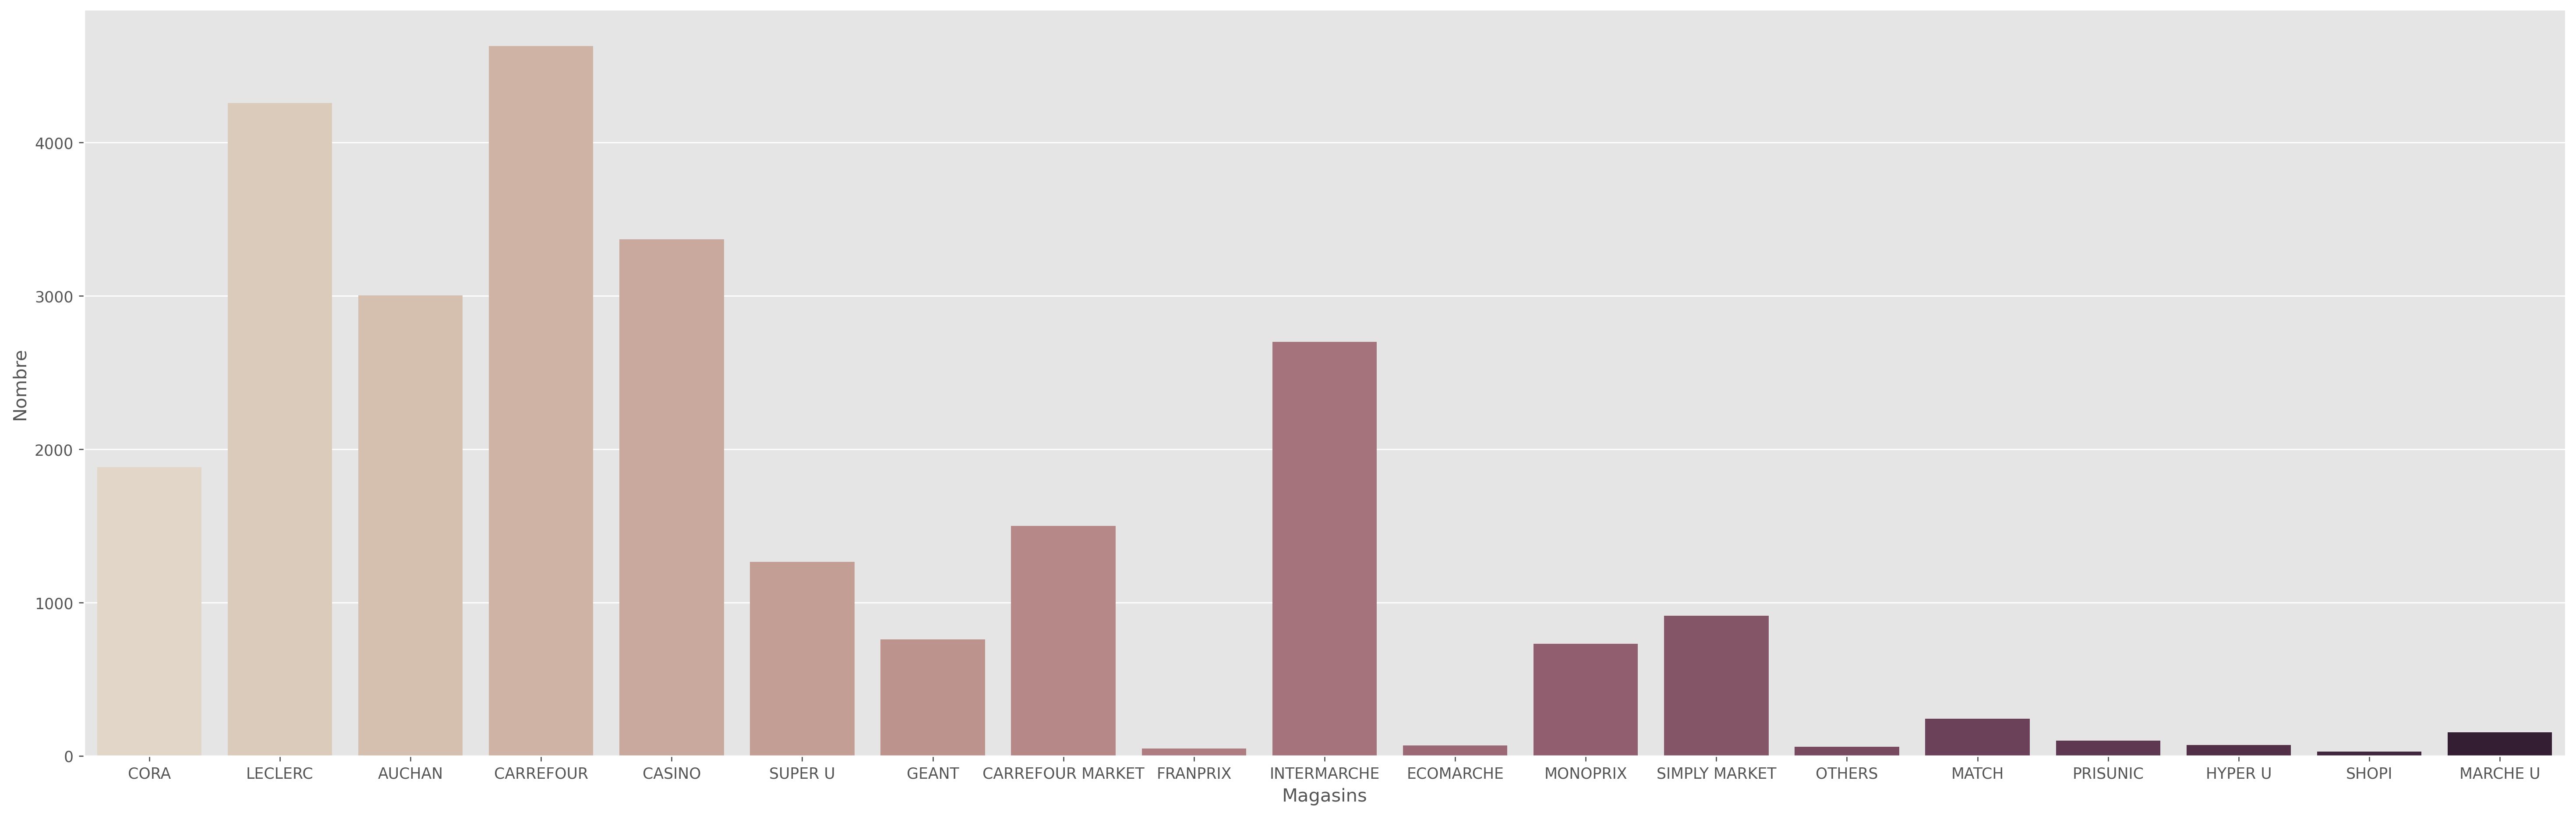

In [16]:
#visualisation des nombres des magasins representé dans la dataset
figure = sns.catplot(x="X5", kind="count", palette="ch:.25", data=dataset)
figure.set_xlabels('Magasins') # not set_label
figure.set_ylabels('Nombre')
figure.fig.set_figwidth(30)
figure.fig.set_figheight(8)

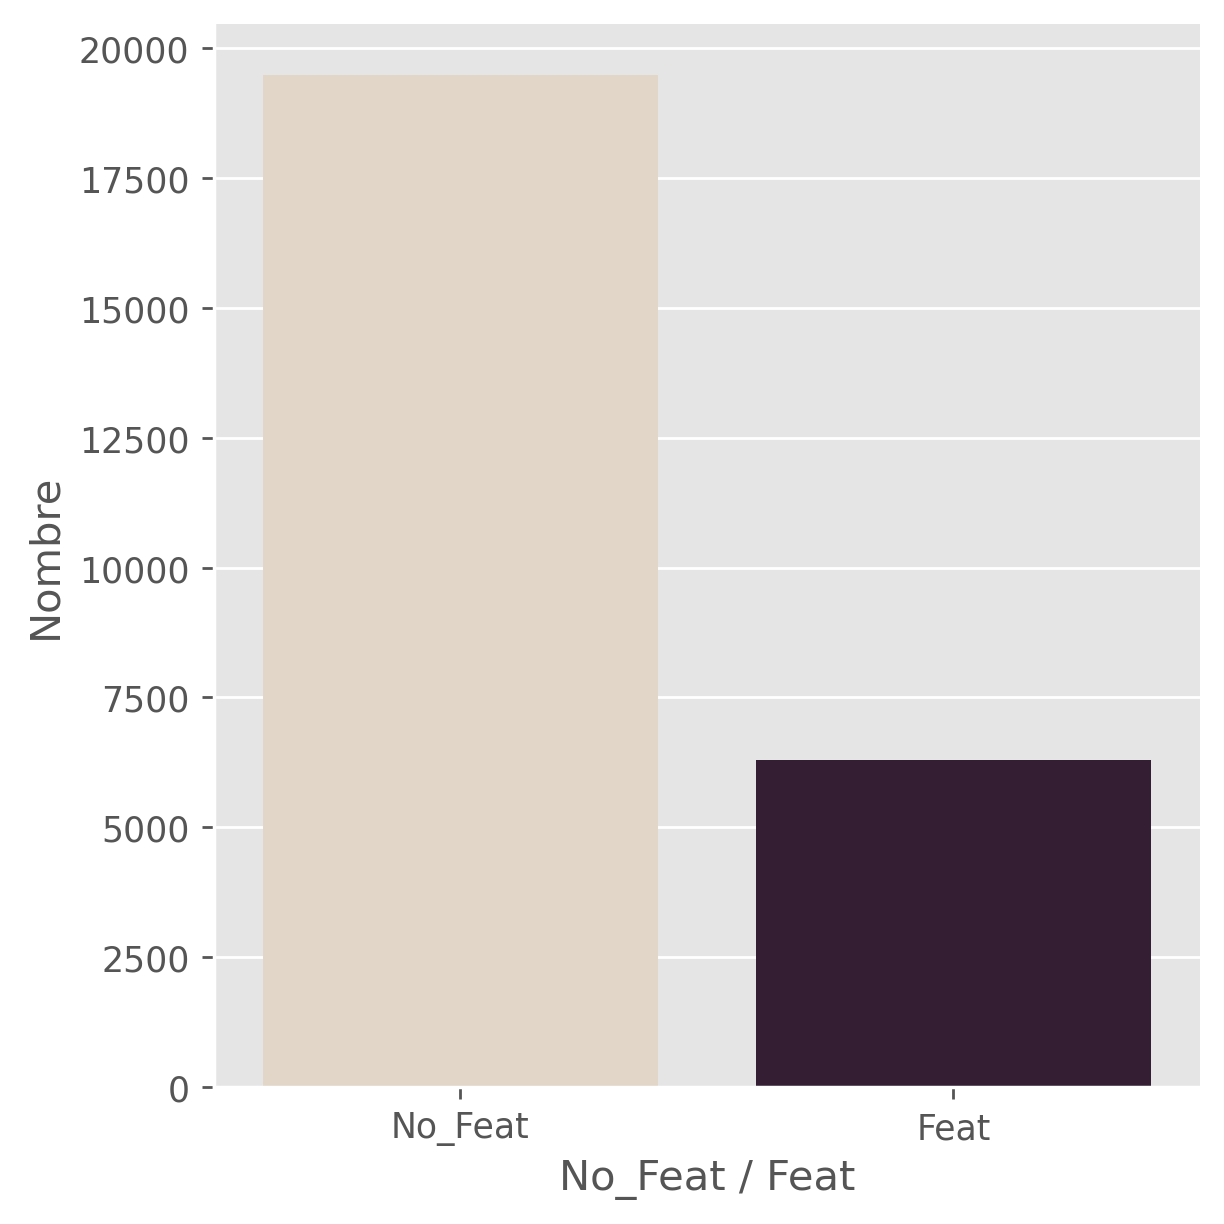

In [17]:
#visualisation des nombre Feat/No Feat
figure = sns.catplot(x="X7", kind="count", palette="ch:.25", data=dataset)
figure.set_xlabels('No_Feat / Feat') # not set_label
figure.set_ylabels('Nombre')
plt.show()

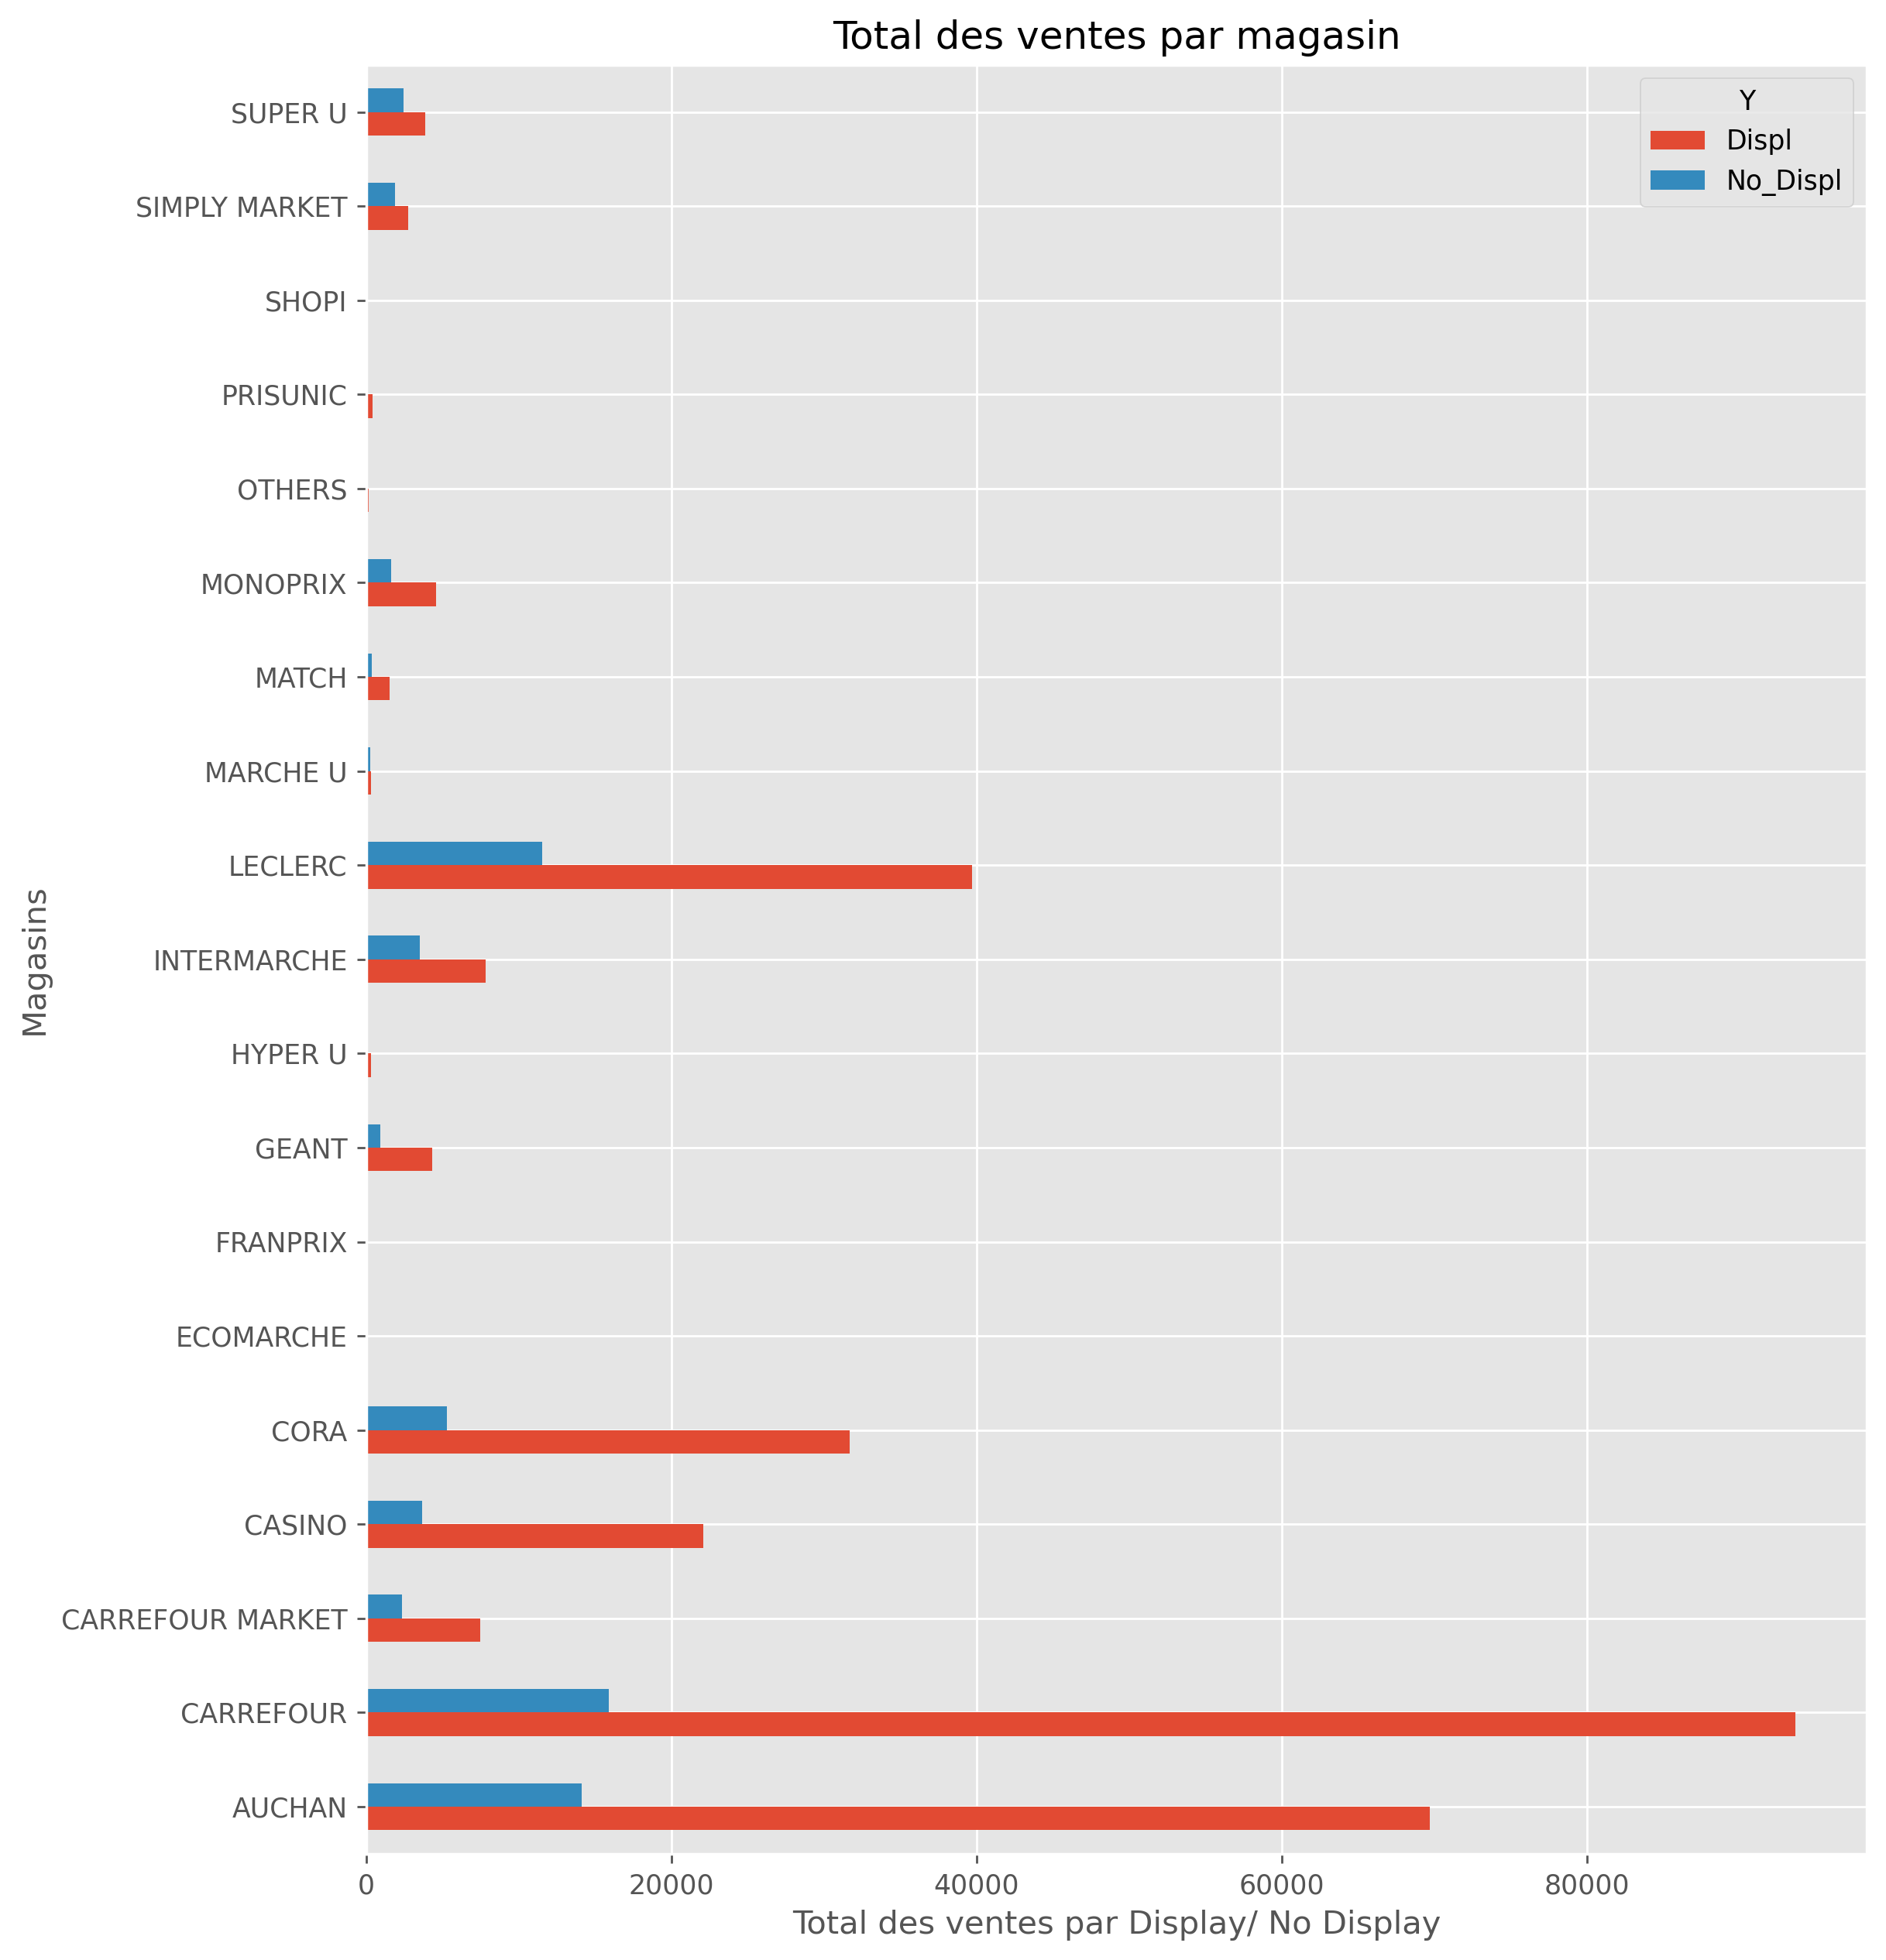

In [18]:
#Visualisation des totales des ventes (X1) avec la methode tableau croisé en pandas .crosstab
pd.crosstab(dataset['X5'],dataset['Y'], dataset["X1"], aggfunc="sum").plot(
    kind = "barh", 
    title = "Total des ventes par magasin",  
    ylabel = "Magasin", 
    figsize = (10, 12)
)
plt.xlabel('Total des ventes par Display/ No Display')
plt.ylabel('Magasins')
plt.show()

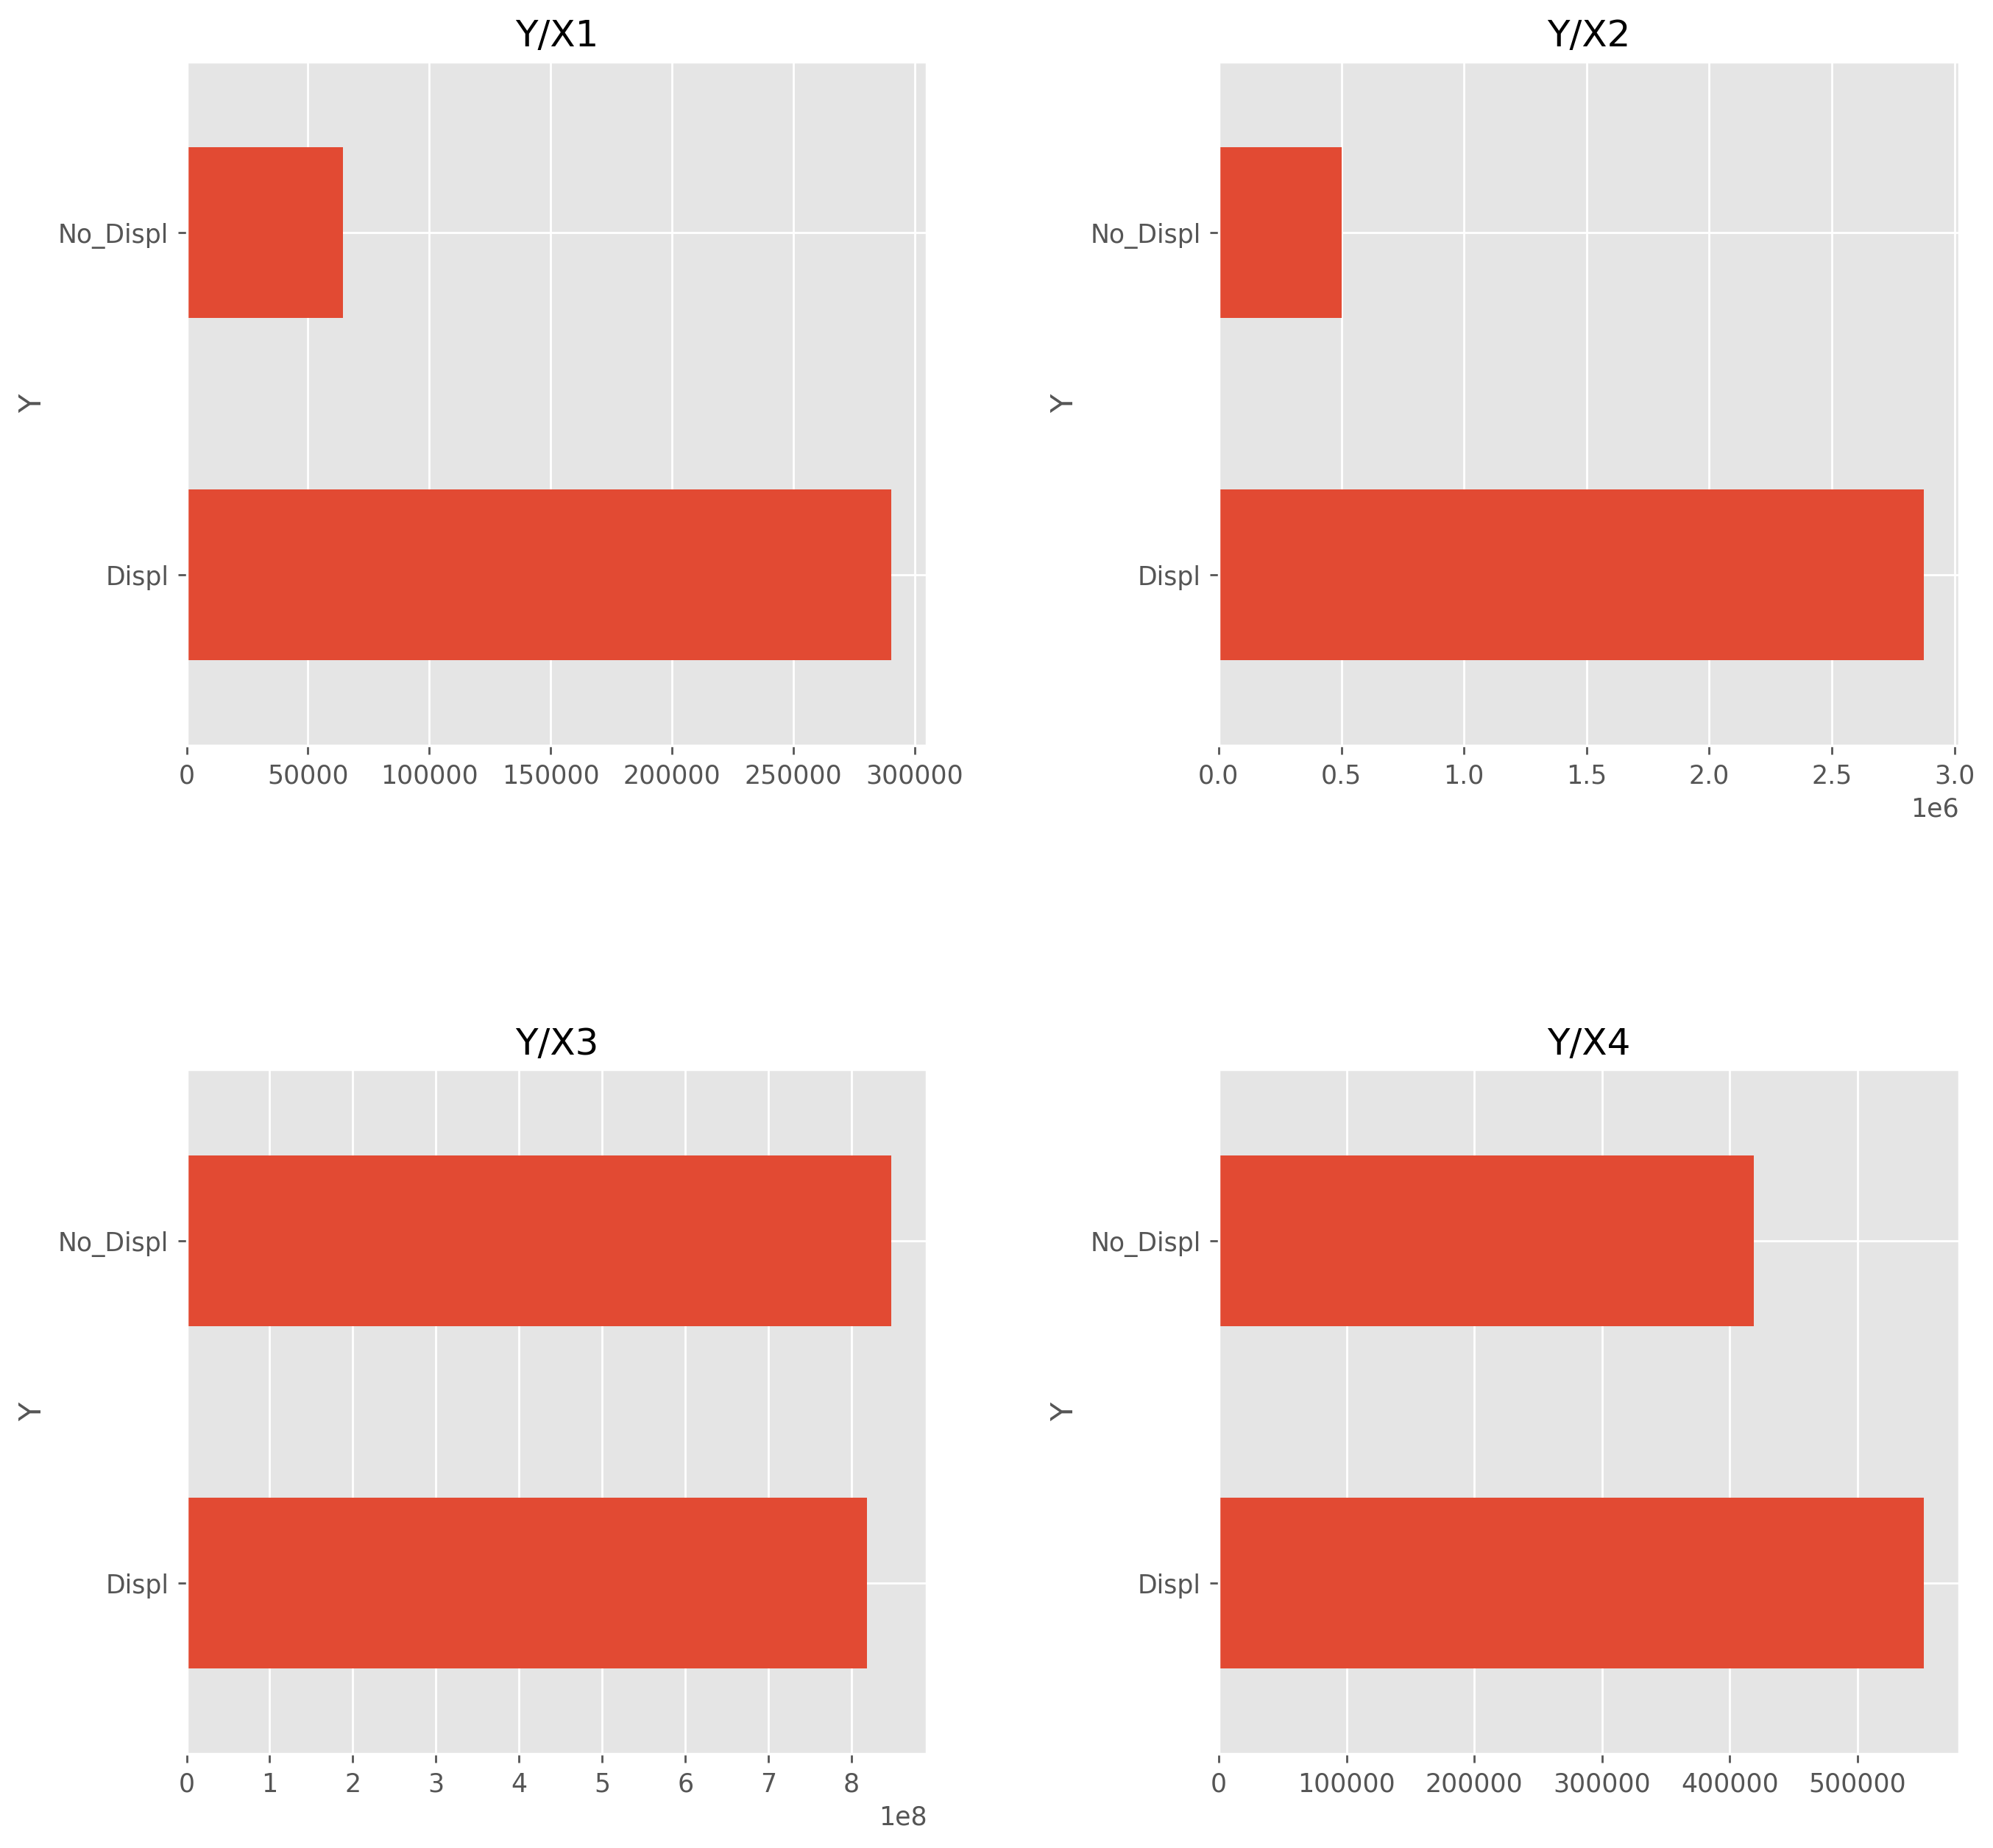

In [19]:
#visualisation de chaque variable X1, X2, X3, X4 en fonction de Y et en aggregation en somme
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(pad=3.0)

dataset.groupby("Y").sum()["X1"].plot(
    kind = "barh", 
    title = "Y/X1", 
    figsize = (12,12),
    ax = axes[0,0]
)
dataset.groupby("Y").sum()["X2"].plot(
    kind = "barh", 
    title = "Y/X2", 
    ax = axes[0,1]
)
dataset.groupby("Y").sum()["X3"].plot(
    kind = "barh", 
    title = "Y/X3", 
    ax = axes[1,0]
)
dataset.groupby("Y").sum()["X4"].plot(
    kind = "barh", 
    title = "Y/X4", 
    ax = axes[1,1]
)
plt.show()

<h2> Imbalanced dataset : </h2>

In [20]:
#nombre des occurence des magasins dans la dataset déséquilibrée
figure = sns.catplot(x="X5", kind="count", palette="ch:.25", data=dataset2)
figure.set_xlabels('Magasins') # not set_label
figure.set_ylabels('Nombre')
figure.fig.set_figwidth(30)
figure.fig.set_figheight(8)

In [21]:
#visualisation des nombre Feat/No Feat
figure = sns.catplot(x="X7", kind="count", palette="ch:.25", data=dataset2)
figure.set_xlabels('Feat/ No Feat') # not set_label
figure.set_ylabels('Nombre')
figure.fig.set_figwidth(4)
figure.fig.set_figheight(4)

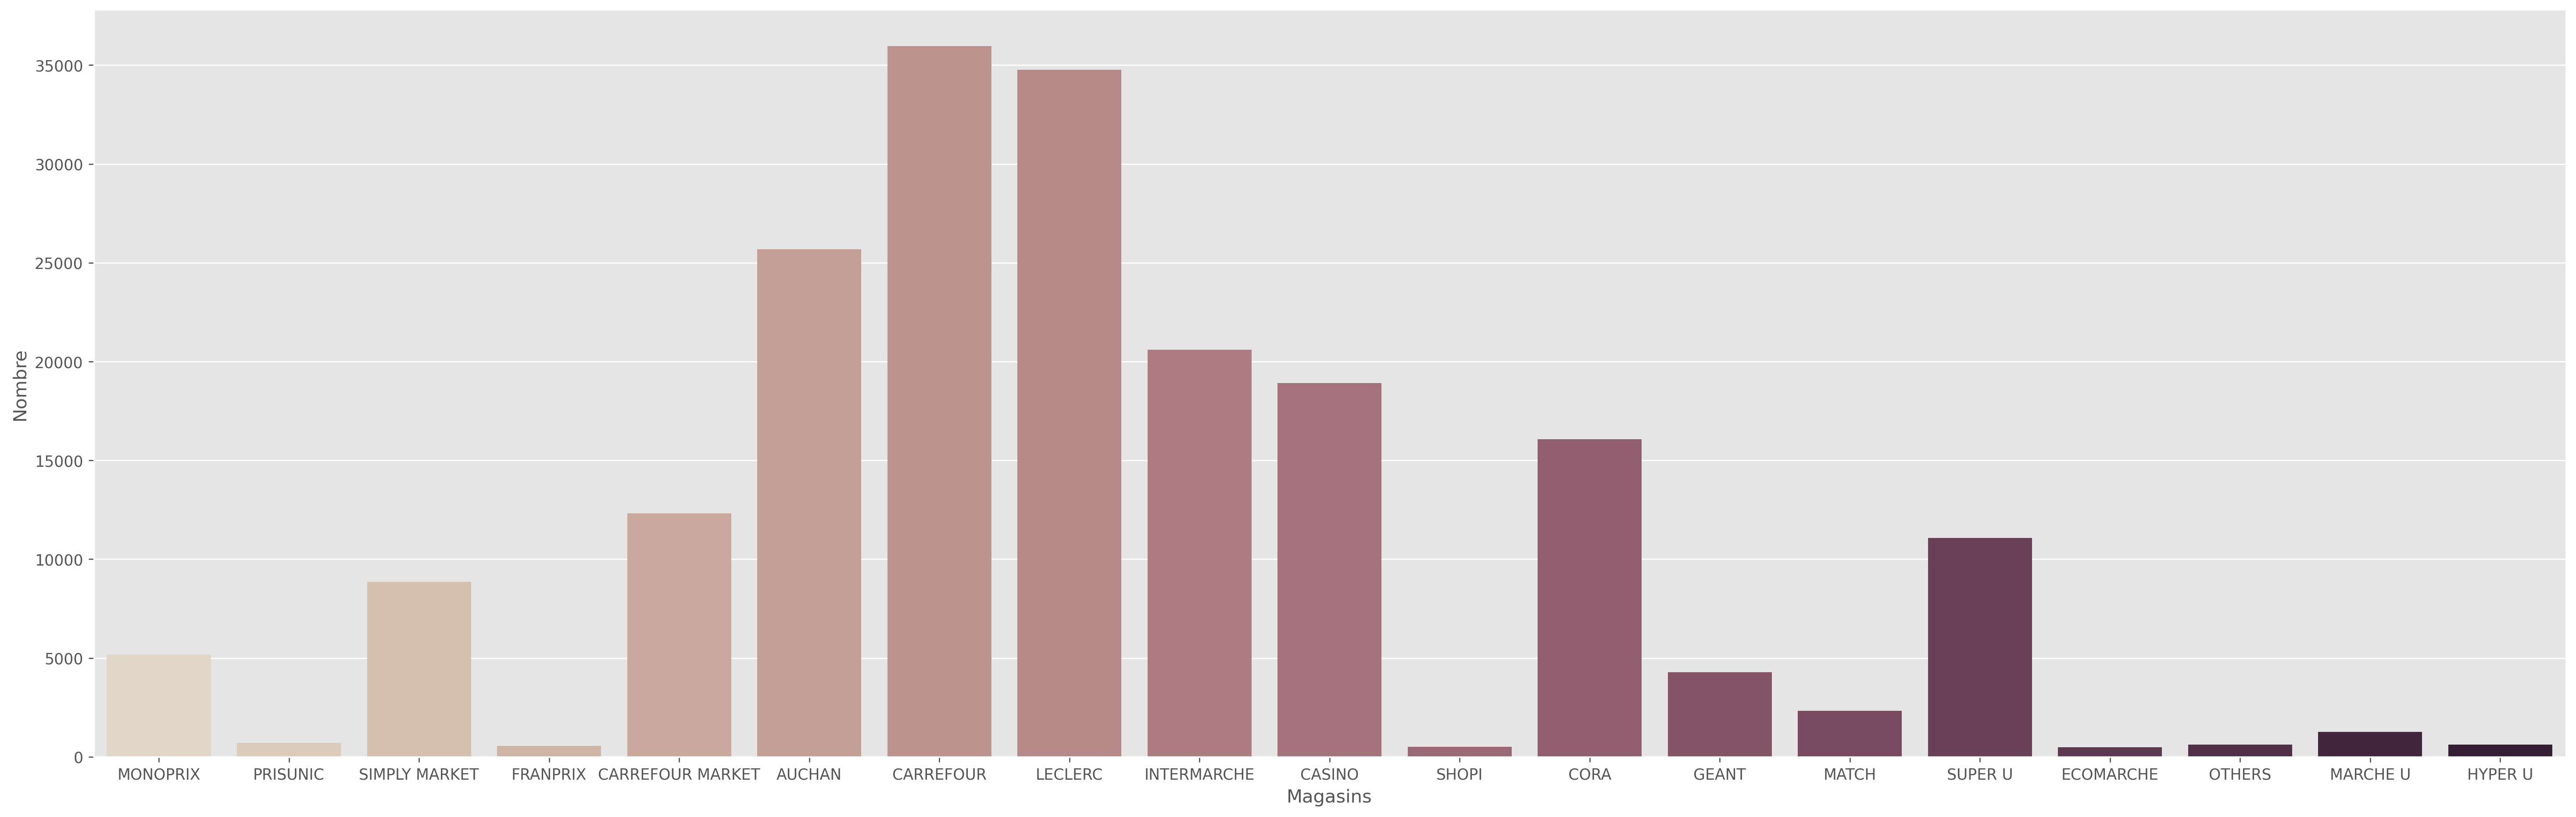

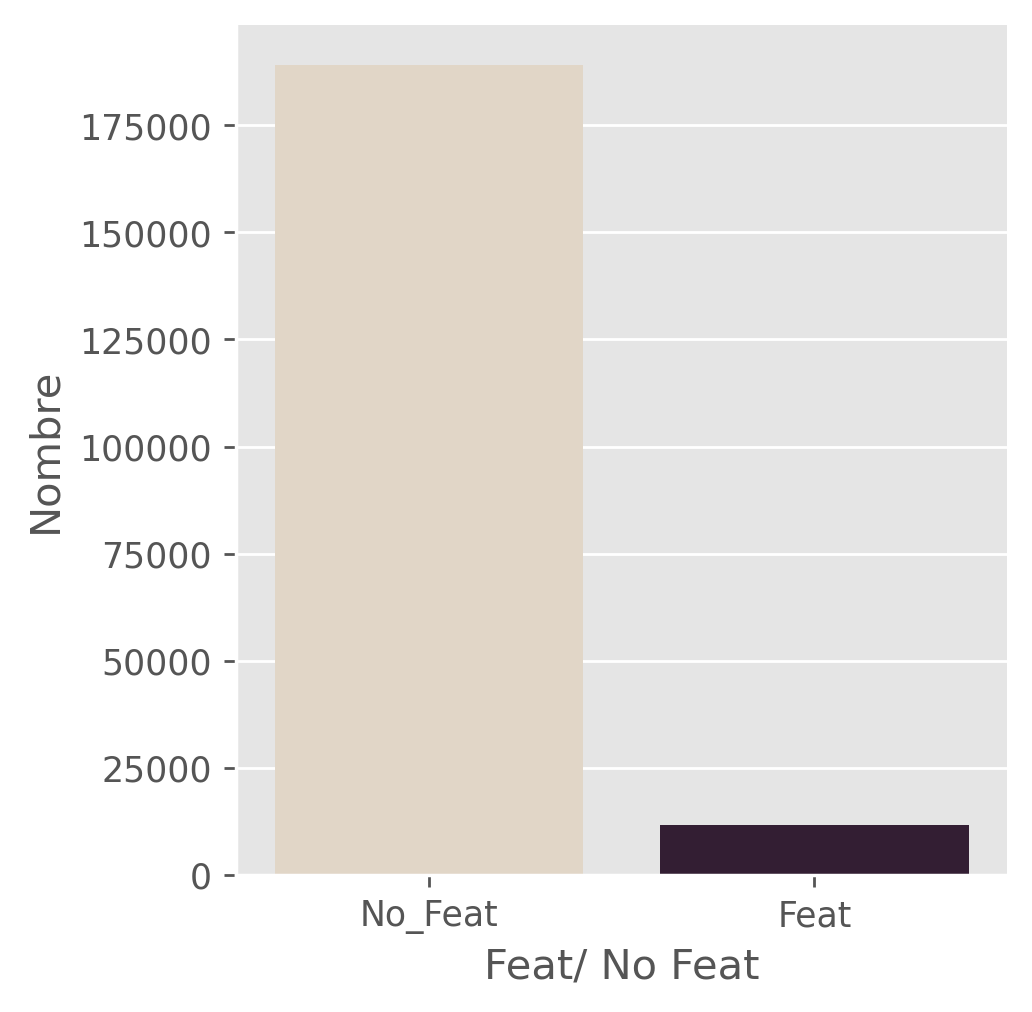

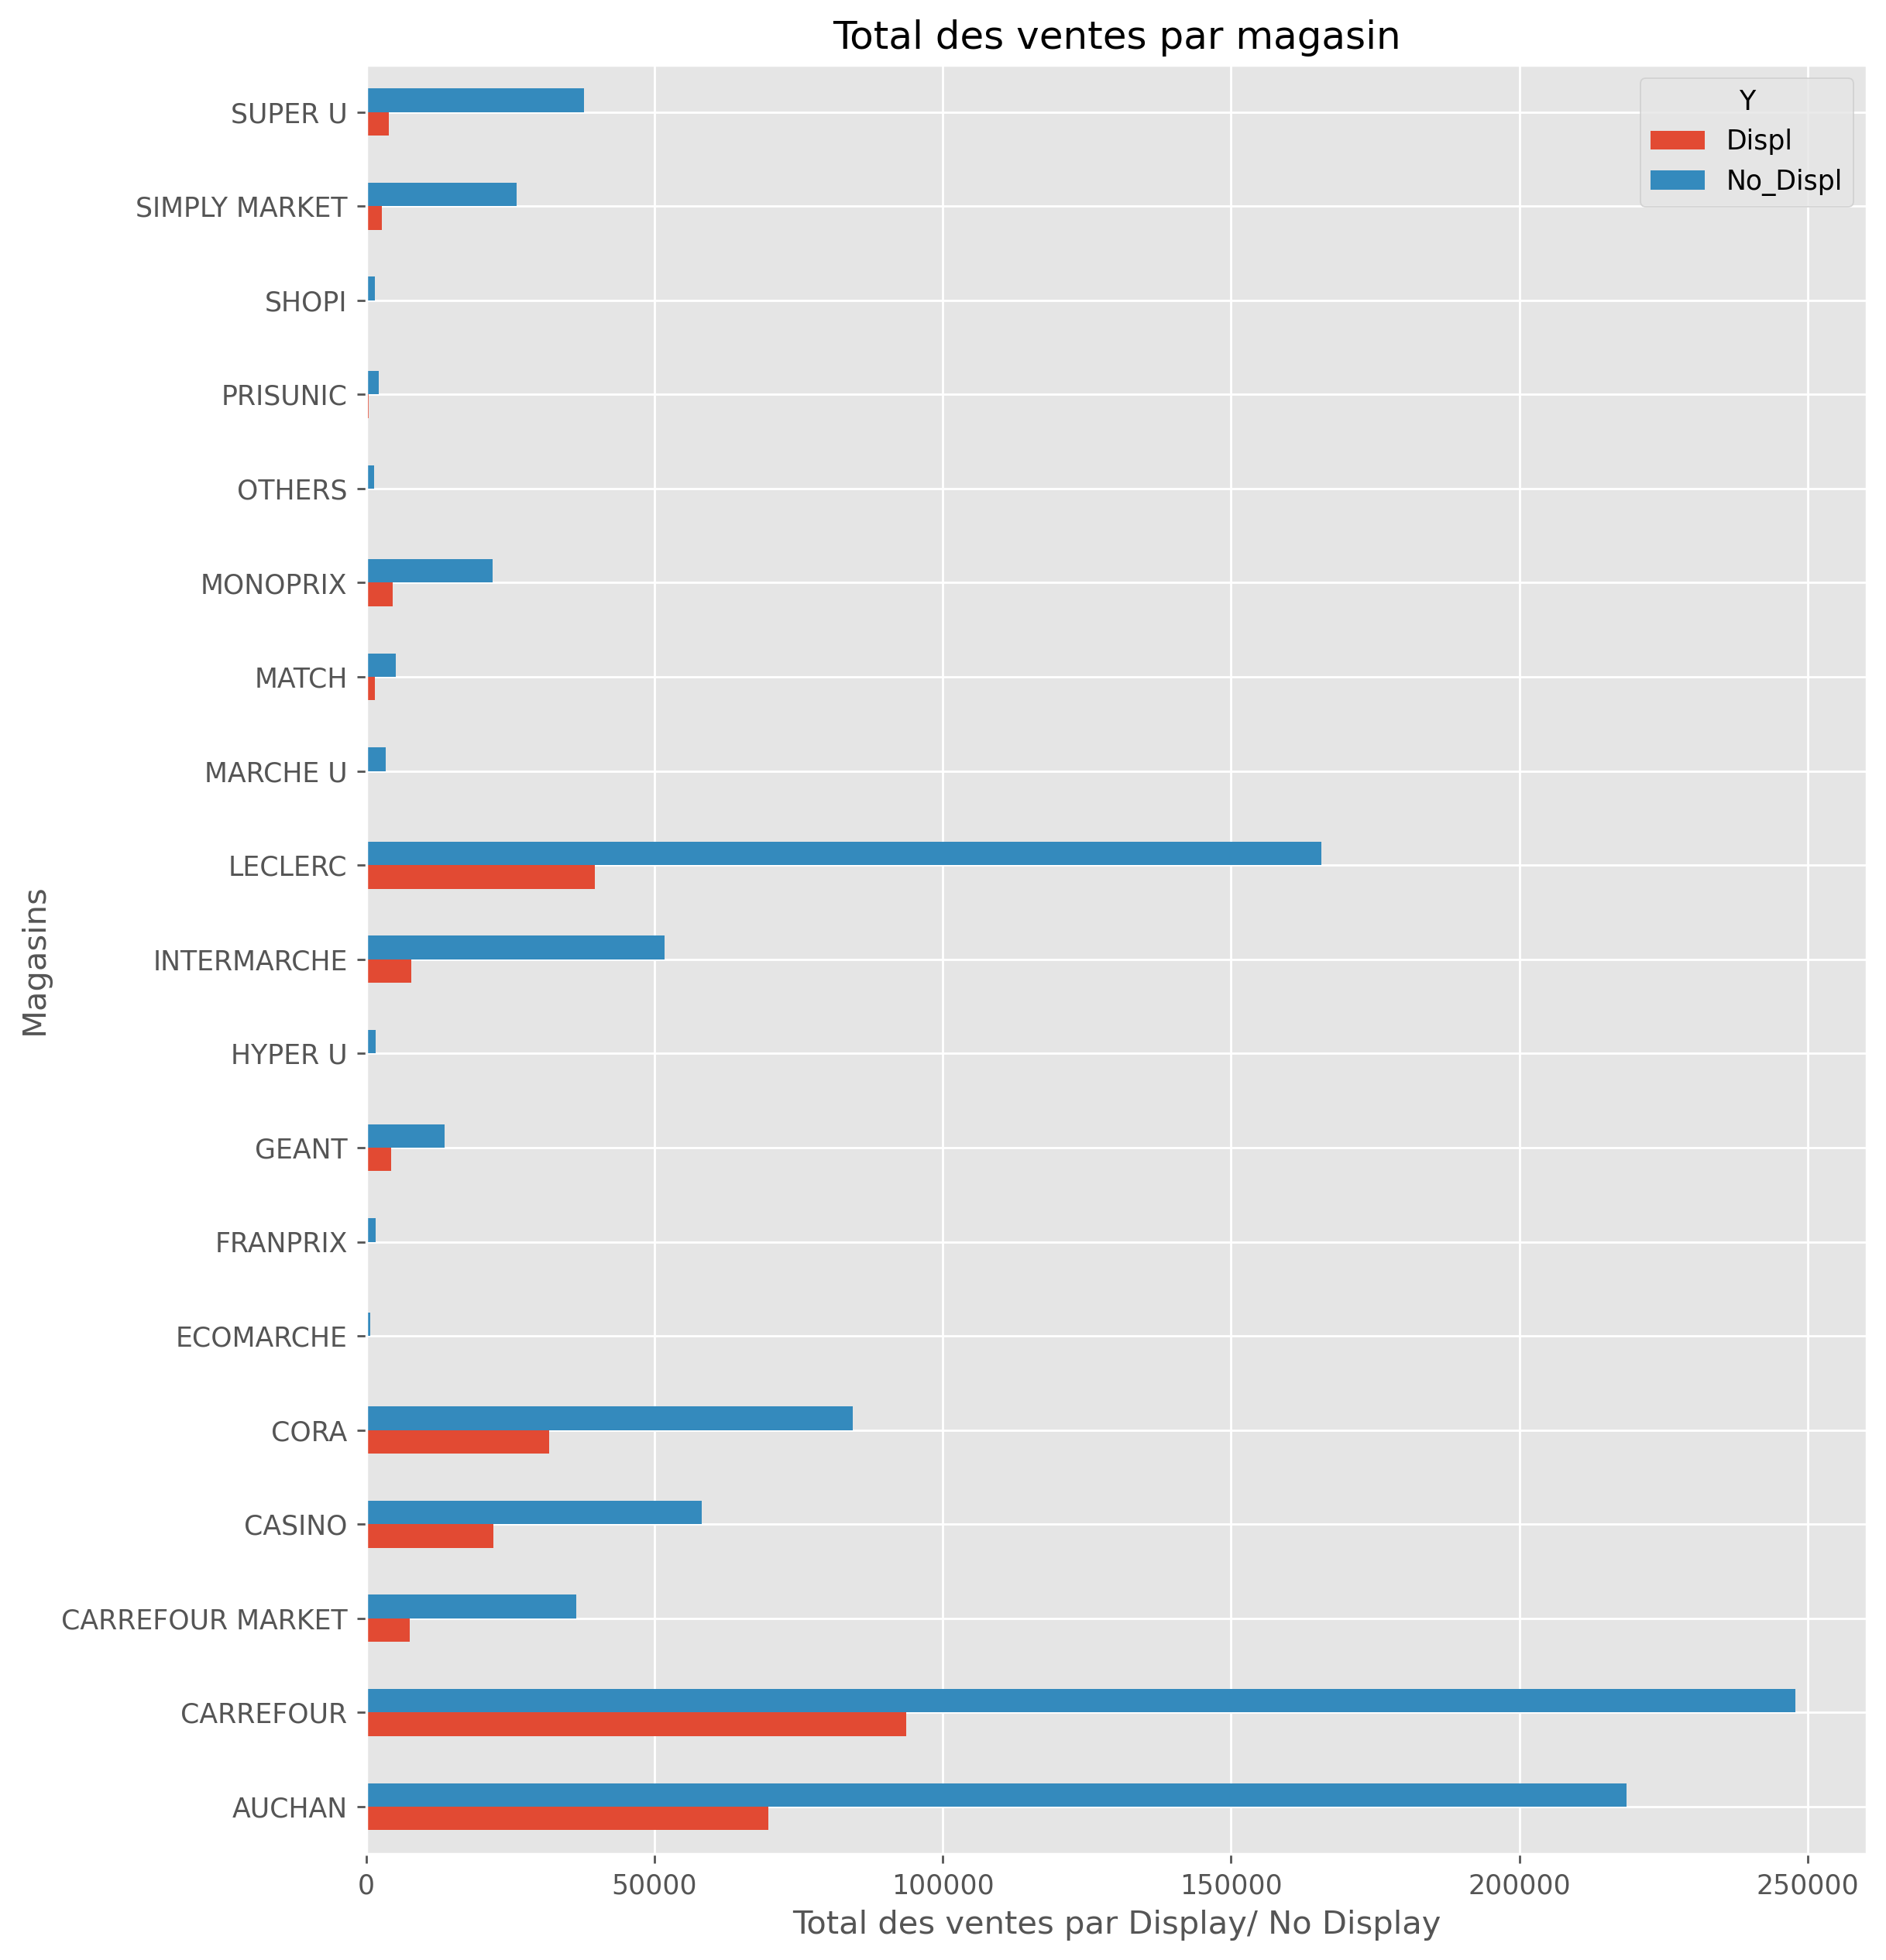

In [22]:
#Total des ventes par pagasin et par Y (display/No DISP) dans la dataset déséquilibrée
pd.crosstab(dataset2['X5'],dataset2['Y'], dataset2["X1"], aggfunc="sum").plot(
    kind = "barh", 
    title = "Total des ventes par magasin",  
    ylabel = "Magasin", 
    figsize = (10, 12)
)
plt.xlabel('Total des ventes par Display/ No Display')
plt.ylabel('Magasins')
plt.show()

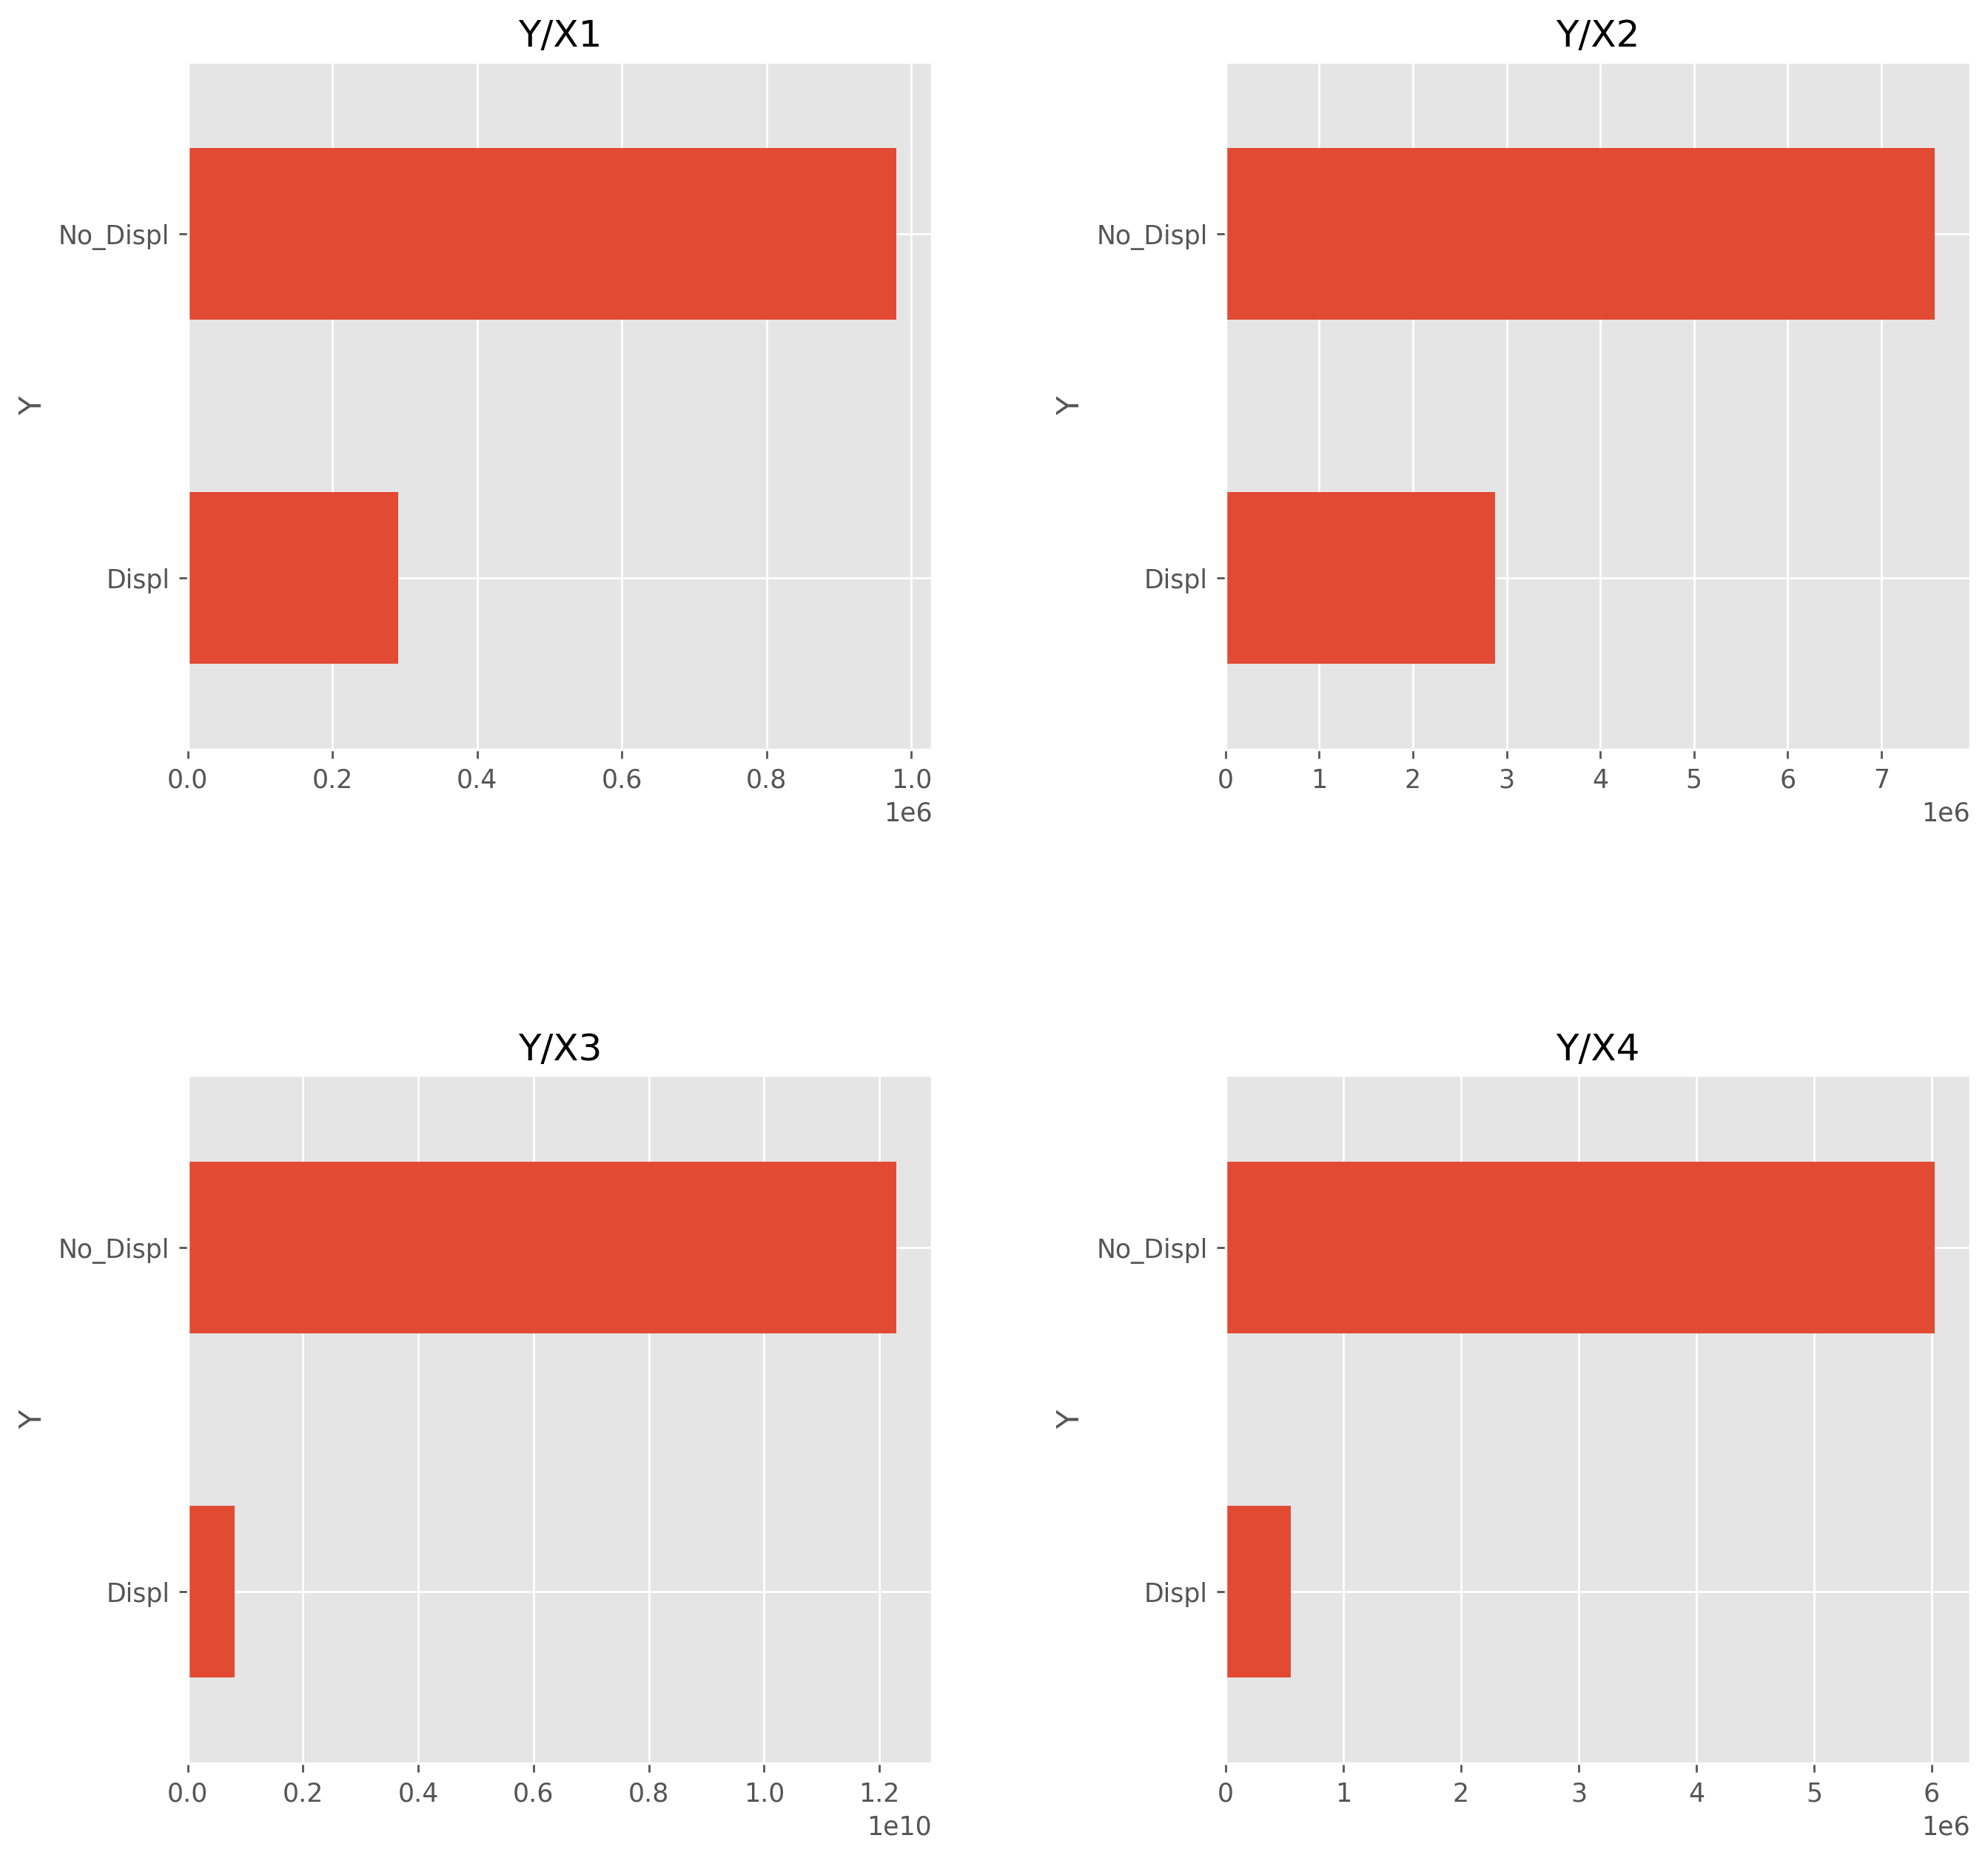

In [23]:
#visualisation de chaque variable X1, X2, X3, X4 en fonction de Y et en aggregation en somme
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(pad=3.0)

dataset2.groupby("Y").sum()["X1"].plot(
    kind = "barh", 
    title = "Y/X1", 
    figsize = (12,12),
    ax = axes[0,0]
)
dataset2.groupby("Y").sum()["X2"].plot(
    kind = "barh", 
    title = "Y/X2", 
    ax = axes[0,1]
)
dataset2.groupby("Y").sum()["X3"].plot(
    kind = "barh", 
    title = "Y/X3", 
    ax = axes[1,0]
)
dataset2.groupby("Y").sum()["X4"].plot(
    kind = "barh", 
    title = "Y/X4", 
    ax = axes[1,1]
)
plt.show()

<h1> Codage des variables qualitatives </h1>

Dans cette partie on va coder les variables qualitatives qu'on dispose dans la dataset (Balanced/Imbalanced) : 
<ul>
    <li>Y : binaire 1,0 => Si Display 1 Sinon 0 </li>
    <li>X7 : binaire 1,0 => Si Feat 1 Sinon 0</li>
    <li>X5 : L'encodage one-hot </li>
</ul>
Pour faire cette transformation, nous allons utiliser la methode <code>.replace()</code> de Pandas pour le codage binaire des variables X7 et Y. Pour la variable X7 on va utiliser l'objet <code>LabelBinarizer()</code> de la bibliothèque Scikit-Learn

In [24]:
#Encode dislay variable : 
#definiton d'un dictionnaire qui represente la manière de l'encodage des variables qualitatives.
#exemple : 1 Si Diplay 0 sinon 
reducer = {"Y": {"No_Displ": 0, "Displ": 1},
                "X7": {"No_Feat": 0, "Feat": 1}
               }
#application du reducer à les deux datasets dont on dispose
dataset = dataset.replace(reducer)
dataset2 = dataset2.replace(reducer)

In [25]:
#utiliser le label Binarizer pour encoder la variables qualitative X5 pour dataset1 
lb = LabelBinarizer()
dataset = dataset.join(pd.DataFrame(lb.fit_transform(dataset["X5"]),
                          columns=lb.classes_, 
                          index=dataset.index))

In [26]:
#utiliser le label Binarizer pour encoder la variables qualitative X5 pour dataset1 
lb2 = LabelBinarizer()
dataset2 = dataset2.join(pd.DataFrame(lb2.fit_transform(dataset2["X5"]),
                          columns=lb2.classes_, 
                          index=dataset2.index))

In [27]:
#supprimer la variables qualitative X5 depuis des deux datasets equilibré et non-equilibré 
dataset = dataset.drop(["X5"], axis=1)
dataset2 = dataset2.drop(["X5"], axis=1)

In [28]:
#affichage des deux dataset pour verifier si l'encodage des variables qualitatives est bien fait !
dataset.head()

,Y,X1,X2,X3,X4,X6,X7,AUCHAN,CARREFOUR,CARREFOUR MARKET,...,INTERMARCHE,LECLERC,MARCHE U,MATCH,MONOPRIX,OTHERS,PRISUNIC,SHOPI,SIMPLY MARKET,SUPER U
1,0,2.0,20.20,47400.0,36.0,72.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,11.90,62000.0,24.0,48.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,8.0,29.52,60661.0,60.0,480.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2.0,16.20,59677.0,19.0,38.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,5.0,62.10,142602.0,50.0,250.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
dataset2.head()

,Y,X1,X2,X3,X4,X6,X7,AUCHAN,CARREFOUR,CARREFOUR MARKET,...,INTERMARCHE,LECLERC,MARCHE U,MATCH,MONOPRIX,OTHERS,PRISUNIC,SHOPI,SIMPLY MARKET,SUPER U
1,0,11.0,35.21,19622.0,8.0,88.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,3.0,13.32,19622.0,12.0,36.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,6.0,8.10,19622.0,5.0,30.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,13.0,19.35,19622.0,8.0,104.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,13.0,90.09,19622.0,28.0,364.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


<h1> Matrice des correlations </h1>

In [30]:
#création de la matrice de corrélation pour la dataset equilibrée restriction sur 'Y', 'X1', 'X2', 'X3', 'X4', 'X6', 'X7'
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(dataset[['Y', 'X1', 'X2', 'X3', 'X4', 'X6', 'X7']].corr(), 
                      vmin=-1, 
                      vmax=1, 
                      annot=True, 
                      cmap="Blues"
                     )
heatmap.set_title('Correlation Heatmap Balanced dataset', fontdict={'fontsize':12}, pad=15);

In [31]:
#création de la matrice de corrélation pour la dataset equilibrée restriction sur 'Y', 'X1', 'X2', 'X3', 'X4', 'X6', 'X7'
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(dataset2[['Y', 'X1', 'X2', 'X3', 'X4', 'X6', 'X7']].corr(), 
                      vmin=-1, 
                      vmax=1, 
                      annot=True, 
                      cmap="Blues"
                     )
heatmap.set_title('Correlation Heatmap Imbalanced dataset', fontdict={'fontsize':12}, pad=15);

<h1> Construction des modèles et evaluation - Balanced dataset </h1>

<h2> Train/Test data Balanced dataset </h2>

Dans cette partie, nous allons ajuster 5 modèles différents, puis sélectionner le meilleur modèle en fonction des critères des modèles. 

In [32]:
#creation des echantillion de test et d'apprentissage d'une manière aléatoire
X = dataset[dataset.columns.to_list()[1:]]
y = dataset["Y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2> Models Training</h2>

Dans cette partie nous allons ajuster les 5 modèles (listé ci-dessous). Les modèles seront sauvegarder dans un dictionnaire et aussi les métriques d'evaluation (Accuracy, Precision, Recall, F1-Score)  : 
<ul> 
    <li> Logistic Regression </li>
    <li> Random Forest </li>
    <li> XGBoost </li>
    <li> Decision Tree Model </li>
    <li> SVM (Support vector machine)</li>
</ul>


In [33]:
#Creation du dictionnaire qui represente les noms de modèles avec les constructeurs
Models = {"Logistic Regression" : {"Model" : LogisticRegression()}, 
          "Random Forest" : {"Model" : RandomForestClassifier()}, 
          "XGBoost" : {"Model" : XGBClassifier()}, 
          "Decision Tree Model" : {"Model" : DecisionTreeClassifier()}, 
          "SVM (Support vector machine)" : {"Model" : SVC(gamma = 'auto')} 
         }


#iterer le dictionnaire des modèles et ajuster chaque modèle à l'ensemble des données
for model in Models:
    print("== Training {} Model ==".format(model))
    Models[model]["Model"].fit(X_train, y_train)
    #make prediction for evaluation 
    y_pred=Models[model]["Model"].predict(X_test)
    
    #evalation avec les métrics accuracy, precision, recall, F1-score  : 
    metrics_dict = {
        "Accuracy": metrics.accuracy_score(y_test, y_pred),
        "Precision": metrics.precision_score(y_test, y_pred),
        "Recall": metrics.recall_score(y_test, y_pred), 
        "F1-Score": metrics.f1_score(y_test, y_pred)
    }
    #sauvegrade des evaluations de chaque modèle dans le dictionnaire des modèles
    Models[model]["Evaluation"] = metrics_dict
    
    print("\n------------------------------\n")
    

== Training Logistic Regression Model ==

------------------------------

== Training Random Forest Model ==

------------------------------

== Training XGBoost Model ==

------------------------------

== Training Decision Tree Model Model ==

------------------------------

== Training SVM (Support vector machine) Model ==

------------------------------



In [34]:
#visualisation des métriques d'evaluation (transformation en dataframe de pandas)
metrics_dict = {}
for model in Models :
    metrics_dict[model] = Models[model]["Evaluation"]

Metrics_mesures = pd.DataFrame(metrics_dict)
Metrics_mesures

,Logistic Regression,Random Forest,XGBoost,Decision Tree Model,SVM (Support vector machine)
Accuracy,0.652511,0.853597,0.833818,0.802792,0.656583
Precision,0.638030,0.851438,0.852466,0.781791,0.596223
Recall,0.664414,0.847714,0.797217,0.826243,0.916501
F1-Score,0.650954,0.849572,0.823916,0.803402,0.722457


Le tableau suivant répertorie les statistiques de précision pour différents types de modèles. Nous allons déterminer le meilleur modèle en fonction de l'une des 4 mesures de précision.
<ul>
    <li>Accuracy: Random Forest était un gagnant clair suivi de XGBoost </li>
    <li>Precision: Random Forest et XGBoost ont presque la meme valeur en précision</li>
    <li>Recall: Random Forest est le plus fort avec un score de 0.846521.</li>
    <li>F1 Score: Toujours Random Forest est meilleur </li>
<ul>

In [35]:
#creation d'un fonction qui s'occupe de l'affichage de la matrice de ROC 
#arguments : le modèle, les X de test, le y de test
#grouper les representations graphiques en une seule figure

def plot_roc(models,X_test,y_test):
    
    index = 0
    colors = ["#191970", "#006400", "#ff0000", "#ff00ff", "#00ff00"]
    plt.figure(figsize=(12,12))
    
    for model in models : 
        y_pred = models[model]["Model"].predict(X_test)
        false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
        roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
        plt.plot(false_positive_rate,
                 true_positive_rate,
                 color = colors[index],
                 label = 'AUC = %0.2f of %s' % (roc_auc, model)
                )
        index+=1
        
    plt.plot([0, 1], [0, 1],linestyle='--', color = "#000000")
    
    plt.title('Receiver Operating Characteristic -- ROC')
    plt.legend(loc = 'lower right')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
plot_roc(Models, X_test, y_test)

Random Forest achieved the best score followed by XGBoost and so on.

In [36]:
#création d'une fonction qui d'occupe de la création des matrice de confusion 
#arguments ; Modèle, X d'entrainment, y de test, nom de modèle.

def confusion_matrix(model, X_train, y_test, model_name):

    y_pred = model.predict(X_test) 
    
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix - {}'.format(model_name), y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
#affichage de la matrice de confusion pour chaque modèle du dictionnaire.
plt.figure(figsize=(6,6))
for model in Models : 
    confusion_matrix(Models[model]["Model"], X_train, y_test, model)

Le modele de Random Forest est probablement un meilleur choix car il offre une précision et un score F1 très important par rapport au autres modèles que nous avons ajusté. De plus, le modèle de Random Forest a un meilleur score ROC, ce qui implique que ce modèle est plus efficace pour séparer les Display des Non Display. Dans la partie qui arrive nous allons faire un ajustement des hyperparamètres du modèle Random Forest et essayer de limiter le nombre des variables de l'input du modèle.

<h2> Random Forest Model tuning </h2>

Random Forest est construit sur la base d'arbres de décision. Random Forest combine arbres de décision et flexibilité, ce qui se traduit par une très grande amélioration de la précision. Il utilise un ensemble de données amorcé (Bootstrap), puis sélectionne un sous-ensemble aléatoire de variables à chaque étape. 

In [37]:
#intiliser un dictionnaire pour stocker les information sur les modèle ajusté (Random Forest)
RandomForestModels = {}

In [38]:
#Insertion du modèle RAndom Forest avec les hyperpar default 
RandomForestModels["Random Forest"] = dict(Models["Random Forest"])
RandomForestModels

{'Random Forest': {'Model': RandomForestClassifier(),
  'Evaluation': {'Accuracy': 0.8535970525499321,
   'Precision': 0.8514376996805112,
   'Recall': 0.847713717693837,
   'F1-Score': 0.8495716278143057}}}

In [39]:
#selection du modèle pour faire le tunning des hyperparametres
model = Models["Random Forest"]["Model"]

In [40]:
#Les variables importantes
important_features = pd.DataFrame({'feature': X_train.columns.to_list(),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
important_features

,feature,importance
1,X2,0.241072
2,X3,0.176539
5,X7,0.145301
3,X4,0.143529
4,X6,0.139999
0,X1,0.081277
9,CASINO,0.022422
6,AUCHAN,0.007824
7,CARREFOUR,0.006389
16,LECLERC,0.005688


## Optimisation des paramétres

In [ ]:
#creation du random search, initialiser les hyperparametres possibles 
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf = RandomForestClassifier()
#lancer le tunning 
model_tunning = RandomizedSearchCV(estimator = clf, 
                                   param_distributions = random_search, 
                                   n_iter = 25, 
                                   cv = 3, 
                                   verbose= 5, 
                                   random_state= 101, 
                                   n_jobs = -1
                                  )

model_tunning.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


In [ ]:
#afficher les bon hyperparamètres 
model_tunning.best_params_

In [ ]:
#faire les préditions avec le modèle tunned
y_pred_best = model_tunning.best_estimator_.predict(X_test)

In [ ]:
#recupérer les metriques d'evaluation
metrics_dict = {
    "Accuracy": metrics.accuracy_score(y_test, y_pred_best),
    "Precision": metrics.precision_score(y_test, y_pred_best),
    "Recall": metrics.recall_score(y_test, y_pred_best), 
    "F1-Score": metrics.f1_score(y_test, y_pred_best)
}
metrics_dict

In [ ]:
#inserer le nouveau modèle tunned au dictionnaire des modèles Random Forest
RandomForestModels["Tunned Random Forest"] = {"Model" : model_tunning.best_estimator_, "Evaluation": metrics_dict}
RandomForestModels

In [ ]:
#afficher sous forme de dataframe et comparer les deux modèles default et dunned 
metrics_dict = {}
for model in RandomForestModels :
    metrics_dict[model] = RandomForestModels[model]["Evaluation"]

Metrics_mesures = pd.DataFrame(metrics_dict)
Metrics_mesures

# Imbalanced datasets training 

In [ ]:
#creation des echantillon de test et d'apprentissage d'une manière aléatoire
X = dataset2[dataset.columns.to_list()[1:]]
y = dataset2["Y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Creation du dictionnaire qui represente les noms de modèles avec les constructeurs
Models_imbal = {"Logistic Regression" : {"Model" : LogisticRegression()}, 
          "Random Forest" : {"Model" : RandomForestClassifier()}, 
          "XGBoost" : {"Model" : XGBClassifier()}, 
          "Decision Tree Model" : {"Model" : DecisionTreeClassifier()}, 
          "AdaBoost" : {"Model" : AdaBoostClassifier()} 
         }
#iterer le dictionnaire des modèles et ajuster chaque modèle à l'ensemble des données
for model in Models_imbal:
    print("== Training {} Model ==".format(model))
    Models_imbal[model]["Model"].fit(X_train, y_train)
    #make prediction for evaluation 
    y_pred=Models_imbal[model]["Model"].predict(X_test)
    
    #evalation : 
    metrics_dict = {
        "Accuracy": metrics.accuracy_score(y_test, y_pred),
        "Precision": metrics.precision_score(y_test, y_pred),
        "Recall": metrics.recall_score(y_test, y_pred), 
        "F1-Score": metrics.f1_score(y_test, y_pred)
    }
    #sauvegrade des evaluations de chaque modèle dans le dictionnaire des modèles
    Models_imbal[model]["Evaluation"] = metrics_dict
    
    print("\n------------------------------\n")

In [ ]:
#visualisation des métriques d'evaluation (transformation en dataframe de pandas)
metrics_dict = {}
for model in Models_imbal :
    metrics_dict[model] = Models_imbal[model]["Evaluation"]

Metrics_mesures = pd.DataFrame(metrics_dict)
Metrics_mesures

Le tableau suivant répertorie les statistiques de précision pour différents types de modèles. Nous allons déterminer le meilleur modèle en fonction de l'une des 4 mesures de précision.
<ul>
    <li>Accuracy: XGBoost était un gagnant clair suivi de Random Forest </li>
    <li>Precision: La regression logistique est en première position</li>
    <li>Recall: Random Forest est presque ont la meme valeur 0.49.</li>
    <li>F1 Score: Toujours Random Forest est meilleur </li>
<ul>

In [ ]:
#afficher les courbes de ROC pour chaque modèle ajusté
plot_roc(Models_imbal, X_test, y_test)

In [ ]:
#afficher les matrices de confusions pour chaque modèle ajusté
plt.figure(figsize=(6,6))
for model in Models_imbal : 
    confusion_matrix(Models_imbal[model]["Model"], X_train, y_test, model)

Le modele de Random Forest est probablement un meilleur choix car il offre un score F1 très important par rapport au autres modèles que nous avons ajusté. De plus, le modèle de Random Forest a un meilleur score ROC, ce qui implique que ce modèle est plus efficace pour séparer les Display des Non Display.

<h2> Random Forest Model tuning - Imbalanced dataset </h2>

SRF a ses limites sur les classes déséquilibrées car il utilise des échantillons d'amorçage (bootstrap) de l'ensemble d'apprentissage pour former chaque arbre. Dans l'apprentissage déséquilibré, la probabilité d'échantillons bootstrap contenant ou sans la classe minoritaire augmente de manière significative, ce qui en fait un mauvais prédicteur de la classe minoritaire.

In [ ]:
#intiliser un dictionnaire pour stocker les information sur les modèle ajusté (Random Forest)
RandomForestModels_imbal = {}

In [ ]:
#inserer le modèle random forest default
RandomForestModels_imbal["Random Forest"] = dict(Models_imbal["Random Forest"])
RandomForestModels_imbal

In [ ]:
#Afficher la matrice de confusion 
confusion_matrix(Models_imbal["Random Forest"]["Model"], X_train, y_test, model)

In [ ]:
#afficher le nombre des Display/ No Display en echantillon de test
values = y_test.value_counts().to_list()
print(" - Count of Y = 1 (Display) = {} \n - Count of Y = 0 (No Display) = {}".format(values[0], values[1]))

<h3> Balanced Random Forest (BRF) - Approche 1 </h3> 

Balanced Random Forest se fait en extrayant de manière itérative des échantillons bootstrap avec des proportions égales de points de données des classes minoritaires et majoritaires. Cest une solution qu'on peut adopter pour surmonter cette la limitation en Imablanced dataset.

In [ ]:
#Ajuster le modèle BalancedRandomForestClassifier
BRFC = BalancedRandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
BRFC.fit(X_train, y_train)
#faire des prédictions
y_pred_BRFC = BRFC.predict(X_test)

In [ ]:
#afficher les metriques d'evaluation 
def get_metrics(y_pred, y_test) : 
    print("Accuracy : {} \nPrecision : {} \nRecall : {} \nF1-Score : {}".format(metrics.accuracy_score(y_test, y_pred),
                                                                                metrics.precision_score(y_test, y_pred),
                                                                                metrics.recall_score(y_test, y_pred), 
                                                                                metrics.f1_score(y_test, y_pred)
                                                                               )
         )
    
get_metrics(y_pred_BRFC, y_test)

metrics_dict = {
    "Accuracy": metrics.accuracy_score(y_test, y_pred_BRFC),
    "Precision": metrics.precision_score(y_test, y_pred_BRFC),
    "Recall": metrics.recall_score(y_test, y_pred_BRFC), 
    "F1-Score": metrics.f1_score(y_test, y_pred_BRFC)
}
#ajouter le modèle Balanced Random Forest (BRF) au dictionnaire des modèle 
RandomForestModels_imbal["Balanced Random Forest (BRF)"] = {"Model" : BRFC, "Evaluation": metrics_dict}

In [ ]:
#afficher la matrice de confusion 
confusion_matrix(Models_imbal[model]["Model"], X_train, y_test, "Balanced Random Forest (BRF)")

<h3> SMOTE (Synthetic Minority Oversampling Technique) et Standard Random Forest </h3>

Nous allons utiliser la technique de SMOTE pour le suréchantillonnage des observations minoritaires. Pour éviter de réaliser un simple clonage des individus minoritaires, le SMOTE se base sur un principe simple : générer de nouveaux individus minoritaires qui ressemblent aux autres, sans être strictement identiques. Cela permet de densifier de façon plus homogène la population d’individus minoritaires.

In [ ]:
dataset2

In [ ]:
#effectuer le oversampling SMOTE 
oversample = SMOTE()
#X et y à partir de oversampling
over_X, over_y = oversample.fit_resample(X, y)
#creation des données de test et d'apprentissage
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.3, stratify=over_y)
#Ajuster le modèle de random Forest sur la data de SMOTE
SMOTE_SRF = RandomForestClassifier()
SMOTE_SRF.fit(over_X_train, over_y_train)
#faire des prédiction en basant sur l'echantillon de test avant sur-echantillonage 
y_pred_SMOTE_SRF = SMOTE_SRF.predict(X_test)

In [ ]:
#afficher les métriques d'evaluation pour le modele Random Forest basé sur SMOTE
get_metrics(y_pred_SMOTE_SRF, y_test)

metrics_dict = {
    "Accuracy": metrics.accuracy_score(y_test, y_pred_SMOTE_SRF),
    "Precision": metrics.precision_score(y_test, y_pred_SMOTE_SRF),
    "Recall": metrics.recall_score(y_test, y_pred_SMOTE_SRF), 
    "F1-Score": metrics.f1_score(y_test, y_pred_SMOTE_SRF)
}

RandomForestModels_imbal["SMOTE"] = {"Model" : SMOTE_SRF, "Evaluation": metrics_dict}

In [ ]:
#matrice de confusion SMOTE+RF
confusion_matrix(RandomForestModels_imbal["SMOTE"]["Model"], X_train, y_test, "SMOTE")

<strong> Recapultatif </strong>

In [ ]:
#afficher les différents modèles et leurs métriques d'evaluation
metrics_dict = {}
for model in RandomForestModels_imbal :
    metrics_dict[model] = RandomForestModels_imbal[model]["Evaluation"]

Metrics_mesures = pd.DataFrame(metrics_dict)
Metrics_mesures

In [ ]:
#afficher les courbes de ROC des modèles
plot_roc(RandomForestModels_imbal, X_test, y_test)